In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure

In [ ]:
import tensorflow as tf

# You'll generate plots of attention in order to see which parts of an image
# your model focuses on during captioning
import matplotlib.pyplot as plt

import collections
import random
import numpy as np
import os
import time
import json
from PIL import Image

In [ ]:
#@title Default title text
# Download caption annotation files
annotation_folder = '/annotations/'
if not os.path.exists(os.path.abspath('.') + annotation_folder):
  annotation_zip = tf.keras.utils.get_file('captions.zip',
                                           cache_subdir=os.path.abspath('.'),
                                           origin='http://images.cocodataset.org/annotations/annotations_trainval2014.zip',
                                           extract=True)
  annotation_file = os.path.dirname(annotation_zip)+'/annotations/captions_train2014.json'
  os.remove(annotation_zip)

# Download image files
image_folder = '/train2014/'
if not os.path.exists(os.path.abspath('.') + image_folder):
  image_zip = tf.keras.utils.get_file('train2014.zip',
                                      cache_subdir=os.path.abspath('.'),
                                      origin='http://images.cocodataset.org/zips/train2014.zip',
                                      extract=True)
  PATH = os.path.dirname(image_zip) + image_folder
  os.remove(image_zip)
else:
  PATH = os.path.abspath('.') + image_folder

13510582272/13510573713 [==============================] - 349s 0us/step


In [ ]:
with open(annotation_file, 'r') as f:
    annotations = json.load(f)
# Group all captions together having the same image ID.
image_path_to_caption = collections.defaultdict(list)
for val in annotations['annotations']:
  caption = f"<start> {val['caption']} <end>"
  image_path = PATH + 'COCO_train2014_' + '%012d.jpg' % (val['image_id'])
  image_path_to_caption[image_path].append(caption)

# 1. EVALUATION METRICS

## Result

In [ ]:
# Bleus in one-to-all
uploaded = files.upload()
random5000 = pd.read_csv('withoutTM-bleus ota 5000 (rd0).csv')

Saving withoutTM-bleus ota 5000 (rd0).csv to withoutTM-bleus ota 5000 (rd0).csv


In [ ]:
# Bleus in one-to-one
uploaded = files.upload()
random5000_oto = pd.read_csv('withoutTM-bleus oto 5000 (rd0).csv')

Saving withoutTM-bleus oto 5000 (rd0).csv to withoutTM-bleus oto 5000 (rd0).csv


In [ ]:
random5000=list(random5000.iloc[:,1])
random5000_oto=list(random5000_oto.iloc[:,1])

In [ ]:
# Average
print('one-to-all',np.mean(random5000))
print('one-to-one',np.mean(random5000_oto))

one-to-all 0.4856426763713424
one-to-one 0.43405738867849775


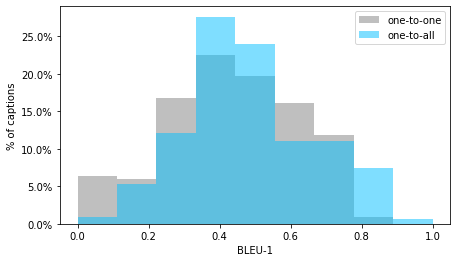

In [ ]:
# Distribution between ota oto
figure(figsize=(7,4))
bins = np.linspace(0, 1, 10)
plt.hist(random5000_oto, bins, alpha=0.5, label='one-to-one',weights=np.ones(len(random5000_oto)) / len(random5000_oto),color = "gray")
plt.hist(random5000, bins, alpha=0.5, label='one-to-all',weights=np.ones(len(random5000)) / len(random5000),color = "deepskyblue")
plt.legend(loc='upper right')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel('% of captions')
plt.xlabel('BLEU-1')
plt.show()

In [ ]:
# %BLEU<0.1
print('one-to-one:',len([i for i in random5000_oto if i<0.1])*100/len(random5000_oto))
print('one-to-all:',len([i for i in random5000 if i<0.1])*100/len(random5000))

one-to-one: 6.1975209916033585
one-to-all: 0.8


In [ ]:
# 0.4<=%BLEU<0.6
print('one-to-one:',len([i for i in random5000_oto if i<0.6 and i>=0.4])*100/len(random5000_oto))
print('one-to-all:',len([i for i in random5000 if i<0.6 and i>=0.4])*100/len(random5000))

one-to-one: 33.94642143142743
one-to-all: 38.3


In [ ]:
# %BLEU>=0.8
print('one-to-one:',len([i for i in random5000_oto if i>=0.8])*100/len(random5000_oto))
print('one-to-all:',len([i for i in random5000 if i>=0.8])*100/len(random5000))

one-to-one: 0.2798880447820872
one-to-all: 4.8


# 2. STRATIFICATION IMPACT - ACCURACY

## 2.1. Result

In [ ]:
# Bleus Stratified sample 5000
uploaded = files.upload()
strati5000=pd.read_csv('merged-bleus 5000 (rd0).csv')

Saving merged-bleus 5000 (rd0).csv to merged-bleus 5000 (rd0).csv


In [ ]:
strati5000=list(strati5000.iloc[:,1])

In [ ]:
# Average
print('random',np.mean(random5000))
print('stratified',np.mean(strati5000))

random 0.4856426763713424
stratified 0.5100874887694297


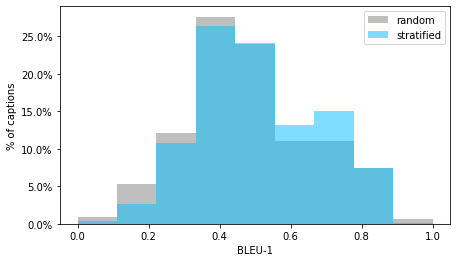

In [ ]:
figure(figsize=(7,4))
bins = np.linspace(0, 1, 10)
plt.hist(random5000, bins, alpha=0.5, label='random',weights=np.ones(len(random5000)) / len(random5000),color = "gray")
plt.hist(strati5000, bins, alpha=0.5, label='stratified',weights=np.ones(len(strati5000)) / len(strati5000),color = "deepskyblue")
plt.legend(loc='upper right')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel('% of captions')
plt.xlabel('BLEU-1')
plt.show()

In [ ]:
# % BLEU<0.3
print('random',len([i for i in random5000 if i<0.3])*100/len(random5000))
print('stratified',len([i for i in strati5000 if i<0.3])*100/len(strati5000))

random 13.4
stratified 9.2


In [ ]:
# % 0.6<=BLEU<0.8
print('random',len([i for i in random5000 if i>=0.6 and i<0.8])*100/len(random5000))
print('stratified',len([i for i in strati5000 if i>=0.6 and i<0.8])*100/len(strati5000))

random 22.7
stratified 25.8


In [ ]:
# %BLEU>0.8
print('random',len([i for i in random5000 if i>=0.8])*100/len(random5000))
print('stratified',len([i for i in strati5000 if i>0.8])*100/len(strati5000))

random 4.8
stratified 4.2


In [ ]:
# max BLEU
print('random',max(random5000))
print('stratified',max(strati5000))

random 0.9391044157537524
stratified 0.8891397050194614


### Validate the gap by 4 more run times

In [ ]:
# 2nd trial
uploaded = files.upload()
random5000_2=pd.read_csv('withoutTM-bleus 5000 (rd1).csv')

In [ ]:
# 2nd trial
uploaded = files.upload()
strati5000_2=pd.read_csv('merged-bleus 5000 (rd1).csv')

random 0.49032683173217845
stratified 0.5111316532496635


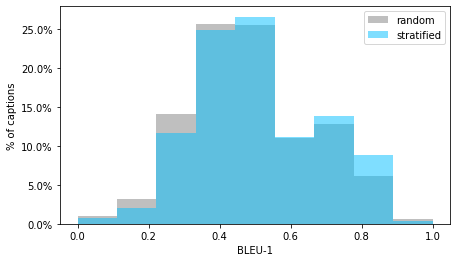

In [ ]:
random5000_2=list(random5000_2.iloc[:,1])
strati5000_2=list(strati5000_2.iloc[:,1])
#Averge
print('random',np.mean(random5000_2))
print('stratified',np.mean(strati5000_2))
#Distribution
figure(figsize=(7,4))
bins = np.linspace(0, 1, 10)
plt.hist(random5000_2, bins, alpha=0.5, label='random',weights=np.ones(len(random5000_2)) / len(random5000_2),color = "gray")
plt.hist(strati5000_2, bins, alpha=0.5, label='stratified',weights=np.ones(len(strati5000_2)) / len(strati5000_2),color = "deepskyblue")
plt.legend(loc='upper right')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel('% of captions')
plt.xlabel('BLEU-1')
plt.show()

In [ ]:
# 3rd trial
uploaded = files.upload()
random5000_3=pd.read_csv('withoutTM-bleus 5000 (rd2).csv')

In [ ]:
# 3rd trial
uploaded = files.upload()
strati5000_3=pd.read_csv('merged-bleus 5000 (rd2).csv')

random 0.48662955141581254
stratified 0.5048034431819275


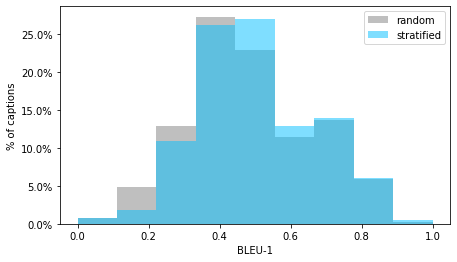

In [ ]:
random5000_3=list(random5000_3.iloc[:,1])
strati5000_3=list(strati5000_3.iloc[:,1])
#Averge
print('random',np.mean(random5000_3))
print('stratified',np.mean(strati5000_3))
#Distribution
figure(figsize=(7,4))
bins = np.linspace(0, 1, 10)
plt.hist(random5000_3, bins, alpha=0.5, label='random',weights=np.ones(len(random5000_3)) / len(random5000_3),color = "gray")
plt.hist(strati5000_3, bins, alpha=0.5, label='stratified',weights=np.ones(len(strati5000_3)) / len(strati5000_3),color = "deepskyblue")
plt.legend(loc='upper right')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel('% of captions')
plt.xlabel('BLEU-1')
plt.show()

In [ ]:
# 4th trial
uploaded = files.upload()
random5000_4=pd.read_csv('withoutTM-bleus 5000 (rd3).csv')

In [ ]:
# 4th trial
uploaded = files.upload()
strati5000_4=pd.read_csv('merged-bleus 5000 (rd3).csv')

random 0.49551149000688355
stratified 0.5106676025243597


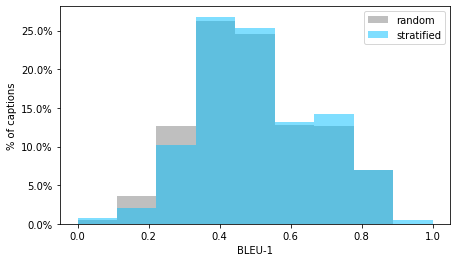

In [ ]:
random5000_4=list(random5000_4.iloc[:,1])
strati5000_4=list(strati5000_4.iloc[:,1])
#Averge
print('random',np.mean(random5000_4))
print('stratified',np.mean(strati5000_4))
#Distribution
figure(figsize=(7,4))
bins = np.linspace(0, 1, 10)
plt.hist(random5000_4, bins, alpha=0.5, label='random',weights=np.ones(len(random5000_4)) / len(random5000_4),color = "gray")
plt.hist(strati5000_4, bins, alpha=0.5, label='stratified',weights=np.ones(len(strati5000_4)) / len(strati5000_4),color = "deepskyblue")
plt.legend(loc='upper right')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel('% of captions')
plt.xlabel('BLEU-1')
plt.show()

In [ ]:
# 5th trial
uploaded = files.upload()
random5000_5=pd.read_csv('withoutTM-bleus 5000 (rd4).csv')

In [ ]:
# 5th trial
uploaded = files.upload()
strati5000_5=pd.read_csv('merged-bleus 5000 (rd4).csv')

random 0.490317790779485
stratified 0.5015963159982421


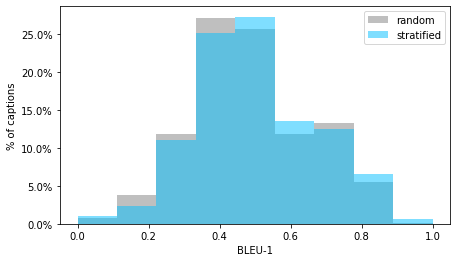

In [ ]:
random5000_5=list(random5000_5.iloc[:,1])
strati5000_5=list(strati5000_5.iloc[:,1])
#Averge
print('random',np.mean(random5000_5))
print('stratified',np.mean(strati5000_5))
#Distribution
figure(figsize=(7,4))
bins = np.linspace(0, 1, 10)
plt.hist(random5000_5, bins, alpha=0.5, label='random',weights=np.ones(len(random5000_5)) / len(random5000_5),color = "gray")
plt.hist(strati5000_5, bins, alpha=0.5, label='stratified',weights=np.ones(len(strati5000_5)) / len(strati5000_5),color = "deepskyblue")
plt.legend(loc='upper right')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel('% of captions')
plt.xlabel('BLEU-1')
plt.show()

## 2.2. Discussion

In [ ]:
# Random prediction
uploaded = files.upload()
random_pred=pd.read_csv('withoutTM-pred 5000 (rd0).csv')

Saving withoutTM-pred 5000 (rd0).csv to withoutTM-pred 5000 (rd0).csv


In [ ]:
# Stratified prediction
uploaded = files.upload()
strati_pred=pd.read_csv('merged-pred 5000 (rd0).csv')

Saving merged-pred 5000 (rd0).csv to merged-pred 5000 (rd0).csv


In [ ]:
# 5000 captions with topic
uploaded = files.upload()
topic5000=pd.read_csv('5000wtopic.csv')

Saving 5000wtopic.csv to 5000wtopic.csv


In [ ]:
topic5000.head()

,Unnamed: 0,index,Dominant_Topic,Perc_Contribution,Topic_Keywords,image_path,text,0
0,0,0,23.0,0.5570,"sit, eat, cut, cake, table, people, man, group...",/content/train2014/COCO_train2014_000000448509...,A group of young people sitting at a table A g...,"['group', 'young', 'people', 'sit', 'table', '..."
1,1,1,10.0,0.5964,"woman, elephant, stand, room, hold, walk, man,...",/content/train2014/COCO_train2014_000000357583...,A woman practices her tennis stance inside a h...,"['woman', 'practice', 'stance', 'hotel', 'room..."
2,2,2,21.0,0.3779,"man, hold, person, walk, hand, eat, carry, pla...",/content/train2014/COCO_train2014_000000414338...,a person standing on a beach holding a surf bo...,"['stand', 'hold', 'girl', 'hold', 'surfboard',..."
3,3,3,13.0,0.6872,"sign, truck, park, street, car, side, motorcyc...",/content/train2014/COCO_train2014_000000368586...,Fire fighter standing near an open window on a...,"['fire', 'fighter', 'stand', 'open', 'window',..."
4,4,4,19.0,0.4818,"sit, plane, woman, airplane, blue, man, large,...",/content/train2014/COCO_train2014_000000011877...,A fighter jet airplane on the runway at an air...,"['fighter_jet', 'airport', 'fighter_jet', 'sit..."


In [ ]:
# Merge prediction set in stratified with topic
strati_topic=pd.merge(topic5000,strati_pred,left_on='image_path',right_on='1')

In [ ]:
# Merge prediction set in random with topic
random_topic=pd.merge(topic5000,random_pred,left_on='image_path',right_on='1')

In [ ]:
# Compute the mean score for each topic
random_score=[]
strati_score=[]
for i in range(30):
  strati_score.append(np.mean(strati_pred.loc[strati_pred['1'].isin(strati_topic.loc[strati_topic['Dominant_Topic']==i,'image_path'])==True,['0']]))
  random_score.append(np.mean(random_pred.loc[random_pred['1'].isin(random_topic.loc[random_topic['Dominant_Topic']==i,'image_path'])==True,['0']]))

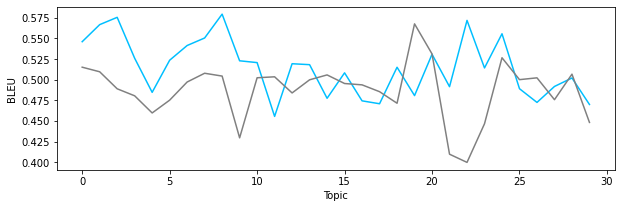

In [ ]:
#plot the mean score for each topic
figure(figsize=(10,3))
x = range(30)

plt.plot(x, strati_score,color = "deepskyblue", label='stratified')
plt.plot(x, random_score,color = "gray", label='random')
plt.xlabel("Topic")
plt.ylabel("BLEU")
plt.xticks([0,5,10,15,20,25,30])
plt.show()

In [ ]:
# create list of topic in prediction set
random_test=list(random_topic['Dominant_Topic'])
strati_test=list(strati_topic['Dominant_Topic'])

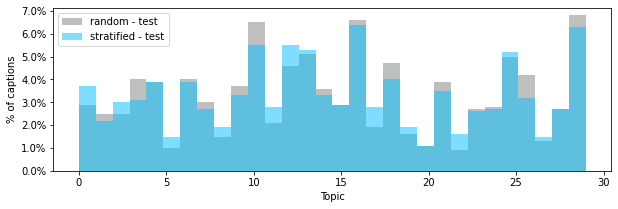

In [ ]:
# plot the distribution topic between random & stratified (stratified represent whole sample)

figure(figsize=(10,3))
bins = 30
plt.hist(random_test, bins, alpha=0.5, label='random - test',weights=np.ones(len(random_test)) / len(random_test),color = "gray")
plt.hist(strati_test, bins, alpha=0.5, label='stratified - test',weights=np.ones(len(strati_test)) / len(strati_test),color = "deepskyblue")
plt.legend(loc='upper left')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel('% of captions')
plt.xlabel('Topic')
plt.show()

In [ ]:
# Caption in topic that have similar average score
for i in random_topic[random_topic['Dominant_Topic']==4]['image_path'].values:
  if i in strati_topic[strati_topic['Dominant_Topic']==4]['image_path'].values:
    print(i)
    print('random', random_topic[random_topic['image_path']==i]['3'].values,random_topic[random_topic['image_path']==i]['0_y'].values)
    print('stratified', strati_topic[strati_topic['image_path']==i]['3'].values,strati_topic[strati_topic['image_path']==i]['0_y'].values)


/content/train2014/COCO_train2014_000000415174.jpg
random ["['many', 'people', 'are', 'on', 'top', 'of', 'large', 'station', 'on', 'the', 'table', 'and', 'a', 'table', 'stands', 'next', 'to', 'get', 'in', 'a', 'subway', 'at', 'a', 'black', 'screen', 'on', 'the', 'table', 'and', 'some', 'books']"] [0.29454644]
stratified ["['many', 'party', 'with', 'multiple', 'vases', 'and', 'children']"] [0.63378349]
/content/train2014/COCO_train2014_000000250278.jpg
random ["['the', 'train', 'on', 'a', 'train']"] [0.41716227]
stratified ["['a', 'bus', 'is', 'strain', 'at', 'a', 'bus', 'is', '<unk>', 'time', 'on', 'a', 'city']"] [0.30054028]
/content/train2014/COCO_train2014_000000434943.jpg
random ["['a', 'train', 'traveling', 'on', 'tracks', 'near', 'a', '<unk>', 'pass']"] [0.6389431]
stratified ["['a', 'train', 'on', 'the', 'tracks', 'on', 'a', 'fence']"] [0.42456726]
/content/train2014/COCO_train2014_000000446470.jpg
random ["['two', 'giraffes', 'are', 'being', '<unk>']"] [0.]
stratified ["['a', '

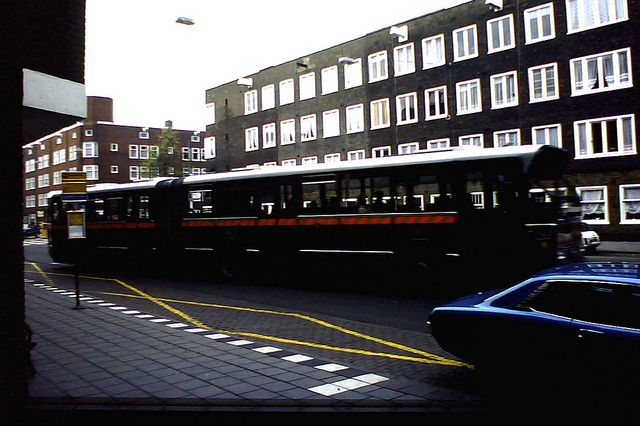

In [ ]:
Image.open('/content/train2014/COCO_train2014_000000250278.jpg')

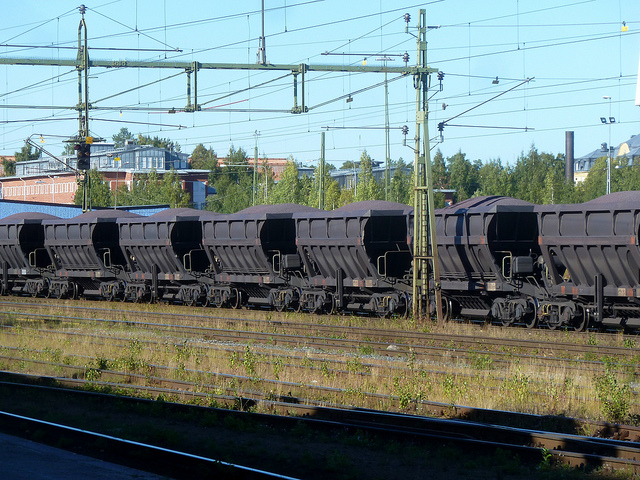

In [ ]:
Image.open('/content/train2014/COCO_train2014_000000434943.jpg')

# 3. STRATIFICATION IMPACT - SCALABILITY

## 3.1. Result

In [ ]:
#1000
uploaded = files.upload()
random_bleus1000=pd.read_csv('withoutTM-bleus 1000.csv')
uploaded = files.upload()
strati_bleus1000=pd.read_csv('merged-bleus 1000.csv')

random 0.4003102117367701
stratified 0.44531801609883487


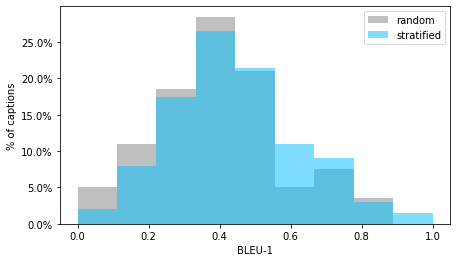

In [ ]:
random_bleus1000=list(random_bleus1000.iloc[:,1])
strati_bleus1000=list(strati_bleus1000.iloc[:,1])
#Averge
mean_random1000=np.mean(random_bleus1000)
mean_strati1000=np.mean(strati_bleus1000)
print('random',mean_random1000)
print('stratified',mean_strati1000)
#Distribution
figure(figsize=(7,4))
bins = np.linspace(0, 1, 10)
plt.hist(random_bleus1000, bins, alpha=0.5, label='random',weights=np.ones(len(random_bleus1000)) / len(random_bleus1000),color = "gray")
plt.hist(strati_bleus1000, bins, alpha=0.5, label='stratified',weights=np.ones(len(strati_bleus1000)) / len(strati_bleus1000),color = "deepskyblue")
plt.legend(loc='upper right')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel('% of captions')
plt.xlabel('BLEU-1')
plt.show()

In [ ]:
#5000
uploaded = files.upload()
random_bleus5000=pd.read_csv('withoutTM-bleus ota 5000 (rd0).csv')
uploaded = files.upload()
strati_bleus5000=pd.read_csv('merged-bleus 5000 (rd0).csv')

Saving withoutTM-bleus ota 5000 (rd0).csv to withoutTM-bleus ota 5000 (rd0) (1).csv


Saving merged-bleus 5000 (rd0).csv to merged-bleus 5000 (rd0) (1).csv


random 0.4856426763713424
stratified 0.5100874887694297


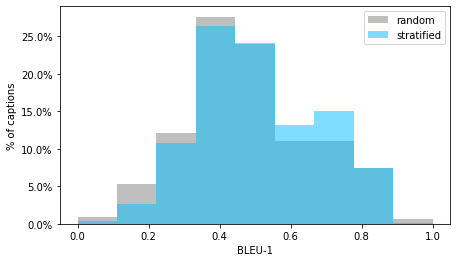

In [ ]:
random_bleus5000=list(random_bleus5000.iloc[:,1])
strati_bleus5000=list(strati_bleus5000.iloc[:,1])
#Averge
mean_random5000=np.mean(random_bleus5000)
mean_strati5000=np.mean(strati_bleus5000)
print('random',mean_random5000)
print('stratified',mean_strati5000)
#Distribution
figure(figsize=(7,4))
bins = np.linspace(0, 1, 10)
plt.hist(random_bleus5000, bins, alpha=0.5, label='random',weights=np.ones(len(random_bleus5000)) / len(random_bleus5000),color = "gray")
plt.hist(strati_bleus5000, bins, alpha=0.5, label='stratified',weights=np.ones(len(strati_bleus5000)) / len(strati_bleus5000),color = "deepskyblue")
plt.legend(loc='upper right')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel('% of captions')
plt.xlabel('BLEU-1')
plt.show()

In [ ]:
#9000
uploaded = files.upload()
random_bleus9000=pd.read_csv('withoutTM-bleus 9000.csv')
uploaded = files.upload()
strati_bleus9000=pd.read_csv('merged-bleus 9000.csv')

Saving withoutTM-bleus 9000.csv to withoutTM-bleus 9000.csv


Saving merged-bleus 9000.csv to merged-bleus 9000.csv


random 0.5009061017381647
stratified 0.5184543962264425


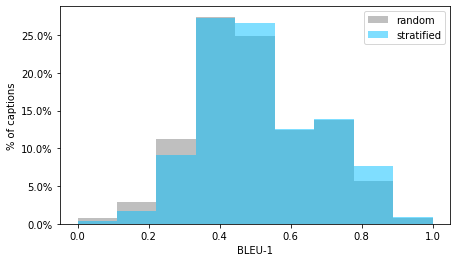

In [ ]:
random_bleus9000=list(random_bleus9000.iloc[:,1])
strati_bleus9000=list(strati_bleus9000.iloc[:,1])
#Averge
mean_random9000=np.mean(random_bleus9000)
mean_strati9000=np.mean(strati_bleus9000)
print('random',mean_random9000)
print('stratified',mean_strati9000)
#Distribution
figure(figsize=(7,4))
bins = np.linspace(0, 1, 10)
plt.hist(random_bleus9000, bins, alpha=0.5, label='random',weights=np.ones(len(random_bleus9000)) / len(random_bleus9000),color = "gray")
plt.hist(strati_bleus9000, bins, alpha=0.5, label='stratified',weights=np.ones(len(strati_bleus9000)) / len(strati_bleus9000),color = "deepskyblue")
plt.legend(loc='upper right')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel('% of captions')
plt.xlabel('BLEU-1')
plt.show()

In [ ]:
#13000
uploaded = files.upload()
random_bleus13000=pd.read_csv('withoutTM-bleus 13000.csv')
uploaded = files.upload()
strati_bleus13000=pd.read_csv('merged-bleus 13000.csv')

random 0.5059296107962367
stratified 0.5124604676102967


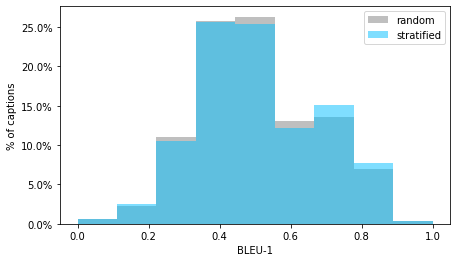

In [ ]:
random_bleus13000=list(random_bleus13000.iloc[:,1])
strati_bleus13000=list(strati_bleus13000.iloc[:,1])
#Averge
mean_random13000=np.mean(random_bleus13000)
mean_strati13000=np.mean(strati_bleus13000)
print('random',mean_random13000)
print('stratified',mean_strati13000)
#Distribution
figure(figsize=(7,4))
bins = np.linspace(0, 1, 10)
plt.hist(random_bleus13000, bins, alpha=0.5, label='random',weights=np.ones(len(random_bleus13000)) / len(random_bleus13000),color = "gray")
plt.hist(strati_bleus13000, bins, alpha=0.5, label='stratified',weights=np.ones(len(strati_bleus13000)) / len(strati_bleus13000),color = "deepskyblue")
plt.legend(loc='upper right')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel('% of captions')
plt.xlabel('BLEU-1')
plt.show()

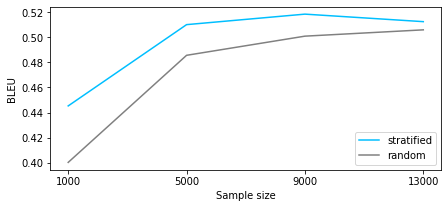

In [ ]:

figure(figsize=(7,3))
sample=range(1000,14000,4000)
random_bleus=[mean_random1000,mean_random5000,mean_random9000, mean_random13000]
strati_bleus=[mean_strati1000,mean_strati5000,mean_strati9000, mean_strati13000]
plt.plot(sample, strati_bleus,color = "deepskyblue", label='stratified')
plt.plot(sample, random_bleus,color = "gray", label='random')

plt.legend(loc='lower right')
plt.xlabel("Sample size")
plt.ylabel("BLEU")
plt.xticks(sample)
plt.show()

## 3.2. Discussion

1000 samples

In [ ]:
#random prediction
uploaded = files.upload()
random_1000=pd.read_csv('withoutTM-pred 1000.csv')

Saving withoutTM-pred 1000.csv to withoutTM-pred 1000.csv


In [ ]:
#strati prediction
uploaded = files.upload()
strati_1000=pd.read_csv('merged-pred 1000.csv')

Saving merged-pred 1000.csv to merged-pred 1000.csv


In [ ]:
#topic
uploaded = files.upload()
topic1000=pd.read_csv('1000wtopic.csv')

Saving 1000wtopic.csv to 1000wtopic.csv


In [ ]:
# merge random prediction with topic
random_topic1000=pd.merge(topic1000,random_1000,left_on='image_path',right_on='1')

In [ ]:
# merge stratified prediction with topic
strati_topic1000=pd.merge(topic1000,strati_1000,left_on='image_path',right_on='1')

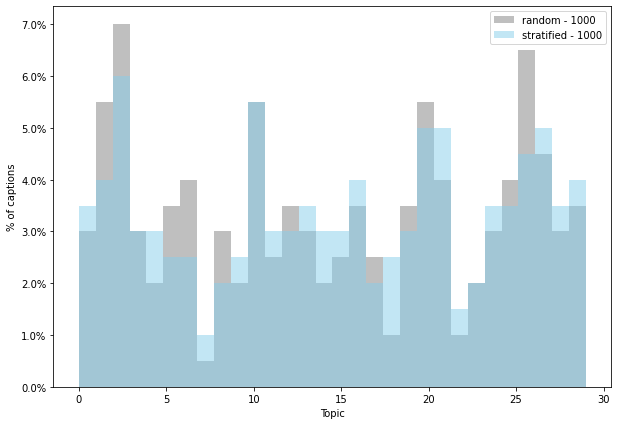

In [ ]:
# Plot topic distribution between random & stratified
from matplotlib.ticker import PercentFormatter
random_test1000=random_topic1000['Dominant_Topic']
strati_test1000=strati_topic1000['Dominant_Topic']
figure(figsize=(10,7))
bins = 30
plt.hist(random_test1000, bins, alpha=0.5, label='random - 1000',weights=np.ones(len(random_test1000)) / len(random_test1000),color = "gray")
plt.hist(strati_test1000, bins, alpha=0.5, label='stratified - 1000',weights=np.ones(len(strati_test1000)) / len(strati_test1000),color = "skyblue")
plt.legend(loc='upper right')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel('% of captions')
plt.xlabel('Topic')
plt.show()



13000 samples

In [ ]:
# random prediction
uploaded = files.upload()
random_13000=pd.read_csv('withoutTM-pred 13000.csv')

Saving withoutTM-pred 13000.csv to withoutTM-pred 13000.csv


In [ ]:
# stratified prediction
uploaded = files.upload()
strati_13000=pd.read_csv('merged-pred 13000.csv')

Saving merged-pred 13000.csv to merged-pred 13000.csv


In [ ]:
# topic
uploaded = files.upload()
topic13000=pd.read_csv('13000wtopic.csv')

Saving 13000wtopic.csv to 13000wtopic.csv


In [ ]:
# merge random prediction with topic
random_topic13000=pd.merge(topic13000,random_13000,left_on='image_path',right_on='1')

In [ ]:
# merge stratified prediction with topic
strati_topic13000=pd.merge(topic13000,strati_13000,left_on='image_path',right_on='1')

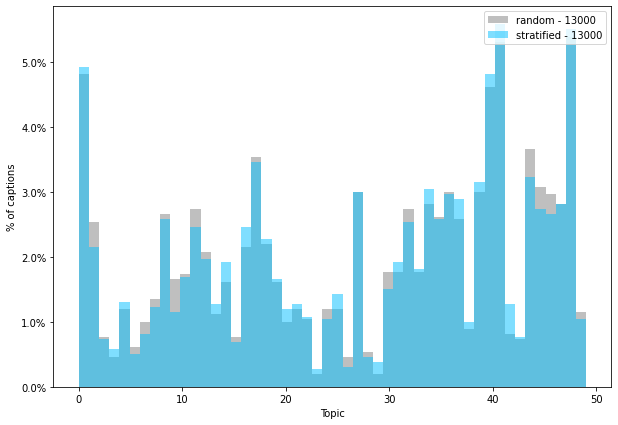

In [ ]:
#plot topic distribution between random and stratified
random_test13000=random_topic13000['Dominant_Topic']
strati_test13000=strati_topic13000['Dominant_Topic']
figure(figsize=(10,7))
bins = 50
plt.hist(random_test13000, bins, alpha=0.5, label='random - 13000',weights=np.ones(len(random_test13000)) / len(random_test13000),color = "gray")
plt.hist(strati_test13000, bins, alpha=0.5, label='stratified - 13000',weights=np.ones(len(strati_test13000)) / len(strati_test13000),color = "deepskyblue")
plt.legend(loc='upper right')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel('% of captions')
plt.xlabel('Topic')
plt.show()



5000 samples

In [ ]:
# random prediction
uploaded = files.upload()
random_5000=pd.read_csv('withoutTM-pred 5000 (rd0).csv')

Saving withoutTM-pred 5000 (rd0).csv to withoutTM-pred 5000 (rd0).csv


In [ ]:
#stratified prediction
uploaded = files.upload()
strati_5000=pd.read_csv('merged-pred 5000 (rd0).csv')

In [ ]:
#topic
uploaded = files.upload()
topic5000=pd.read_csv('5000wtopic.csv')

Saving 5000wtopic.csv to 5000wtopic.csv


In [ ]:
# merge random prediction with topic
random_topic5000=pd.merge(topic5000,random_5000,left_on='image_path',right_on='1')

In [ ]:
# merge stratified prediction with topic
strati_topic5000=pd.merge(topic5000,strati_5000,left_on='image_path',right_on='1')

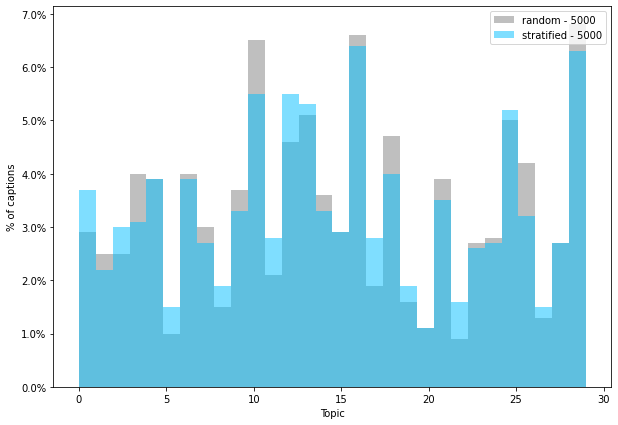

In [ ]:
# plot topic distribution between random & stratified
from matplotlib.ticker import PercentFormatter
random_test5000=random_topic5000['Dominant_Topic']
strati_test5000=strati_topic5000['Dominant_Topic']
figure(figsize=(10,7))
bins = 30
plt.hist(random_test5000, bins, alpha=0.5, label='random - 5000',weights=np.ones(len(random_test5000)) / len(random_test5000),color = "gray")
plt.hist(strati_test5000, bins, alpha=0.5, label='stratified - 5000',weights=np.ones(len(strati_test5000)) / len(strati_test5000),color = "deepskyblue")
plt.legend(loc='upper right')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel('% of captions')
plt.xlabel('Topic')
plt.show()



9000 samples

In [ ]:
# random prediction
uploaded = files.upload()
random_9000=pd.read_csv('withoutTM-pred 9000.csv')

Saving withoutTM-pred 9000.csv to withoutTM-pred 9000.csv


In [ ]:
# stratified prediction
uploaded = files.upload()
strati_9000=pd.read_csv('merged-pred 9000.csv')

Saving merged-pred 9000.csv to merged-pred 9000.csv


In [ ]:
# topic
uploaded = files.upload()
topic9000=pd.read_csv('9000wtopic.csv')

Saving 9000wtopic.csv to 9000wtopic.csv


In [ ]:
# merge random prediction with topic
random_topic9000=pd.merge(topic9000,random_9000,left_on='image_path',right_on='1')

In [ ]:
# merge stratified prediction with topic
strati_topic9000=pd.merge(topic9000,strati_9000,left_on='image_path',right_on='1')

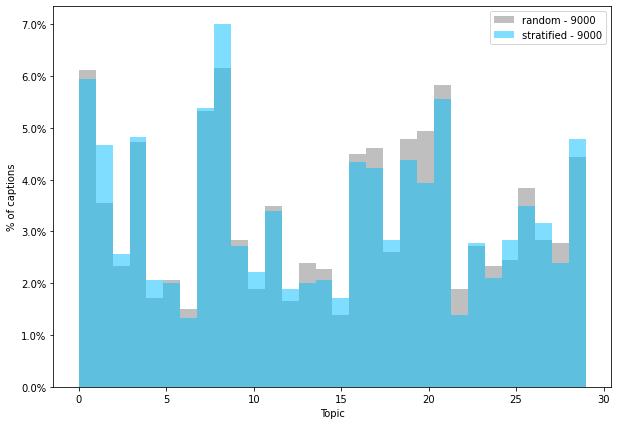

In [ ]:
#plot topic distribution between random and stratified
from matplotlib.ticker import PercentFormatter
random_test9000=random_topic9000['Dominant_Topic']
strati_test9000=strati_topic9000['Dominant_Topic']
figure(figsize=(10,7))
bins = 30
plt.hist(random_test9000, bins, alpha=0.5, label='random - 9000',weights=np.ones(len(random_test9000)) / len(random_test9000),color = "gray")
plt.hist(strati_test9000, bins, alpha=0.5, label='stratified - 9000',weights=np.ones(len(strati_test9000)) / len(strati_test9000),color = "deepskyblue")
plt.legend(loc='upper right')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel('% of captions')
plt.xlabel('Topic')
plt.show()



In [ ]:
#Compute average %gap of topic sample between random & stratified 
gap13000=0
for i in range(50):
  # compute % of topic
  rand=len([j for j in random_test13000 if j ==i])/len(random_test13000)*100
  stra=len([j for j in strati_test13000 if j ==i])/len(random_test13000)*100
  # compute different in %
  gap13000+=(abs(rand-stra))
print(gap13000/50)

0.16461538461538464


In [ ]:
#Compute average %gap of topic sample between random & stratified 
gap9000=0
for i in range(30):
  # compute % of topic
  rand=len([j for j in random_test9000 if j ==i])/len(random_test9000)*100
  stra=len([j for j in strati_test9000 if j ==i])/len(random_test9000)*100
  # compute different in %
  gap9000+=(abs(rand-stra))
print(gap9000/30)

0.32592592592592595


In [ ]:
#Compute average %gap of topic sample between random & stratified 
gap5000=0
for i in range(30):
  # compute % of topic
  rand=len([j for j in random_test5000 if j ==i])/len(random_test5000)*100
  stra=len([j for j in strati_test5000 if j ==i])/len(random_test5000)*100
  # compute different in %
  gap5000+=(abs(rand-stra))
print(gap5000/30)

0.4199999999999998


In [ ]:
#Compute average %gap of topic sample between random & stratified 
gap1000=0
for i in range(30):
  # compute % of topic
  rand=len([j for j in random_test1000 if j ==i])/len(random_test1000)*100
  stra=len([j for j in strati_test1000 if j ==i])/len(random_test1000)*100
  # compute different in %
  gap1000+=(abs(rand-stra))
  
print(gap1000/30)

0.7


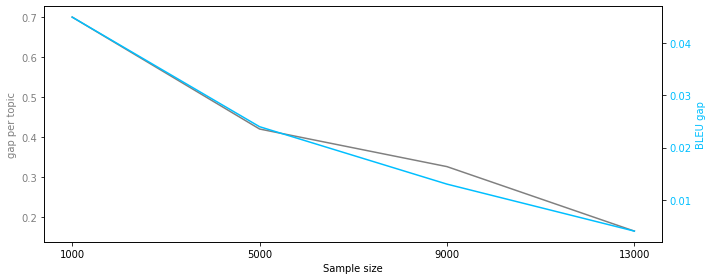

In [ ]:
# plotiing gap in BLEU vs gap in topic distribution

sample=range(1000,14000,4000)
gap_topic=[gap1000/30,gap5000/30,gap9000/30, gap13000/50]
gap_improve=np.array(withtopic_bleus)-np.array(notopic_bleus)
fig, ax1 = plt.subplots(1,1,figsize=(10,4))

ax1.set_xlabel('Sample size')
ax1.set_ylabel('gap per topic', color='gray')
ax1.plot(sample, gap_topic, color='gray')
ax1.tick_params(axis='y', labelcolor='gray')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('BLEU gap', color='deepskyblue')  # we already handled the x-label with ax1
ax2.plot(sample, gap_improve, color='deepskyblue')
ax2.tick_params(axis='y', labelcolor='deepskyblue')
plt.xticks(sample)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# 4. IMAGE ENCODERS

## 4.2 Discussion 
<No Result Figures here as: 
- epoch take from other notebooks.
- accuracy draw in word>

In [12]:
# bleus inception 30 epoch (highest score)
uploaded = files.upload()
strati_inception_bleus=pd.read_csv('merged-bleus 5000 30epoch.csv')
# bleus effnet 20 epoch (highest score)
uploaded = files.upload()
strati_efficient_bleus=pd.read_csv('merged - EffNet bleus 20epoch.csv')

Saving merged-bleus 5000 30epoch.csv to merged-bleus 5000 30epoch.csv


Saving merged - EffNet bleus 20epoch.csv to merged - EffNet bleus 20epoch.csv


In [ ]:
# prediction inception 30 epoch (highest score)
uploaded = files.upload()
strati_inception_pred=pd.read_csv('merged-pred 5000 30epoch.csv')
# prediction effnet 30 epoch (highest score)
uploaded = files.upload()
strati_efficient_pred=pd.read_csv('merged - EffNet pred 20epoch.csv')

Saving merged-pred 5000 30epoch.csv to merged-pred 5000 30epoch.csv


Saving merged - EffNet pred.csv to merged - EffNet pred.csv


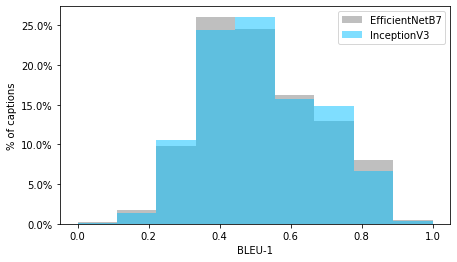

In [ ]:
#plot bleus distribution
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
strati_inception_bleus1=list(strati_inception_bleus.iloc[:,1])
strati_efficient_bleus1=list(strati_efficient_bleus.iloc[:,1])

figure(figsize=(7,4))
bins = np.linspace(0, 1, 10)
plt.hist(strati_efficient_bleus1, bins, alpha=0.5, label='EfficientNetB7',weights=np.ones(len(strati_efficient_bleus1)) / len(strati_efficient_bleus1),color = "gray")
plt.hist(strati_inception_bleus1, bins, alpha=0.5, label='InceptionV3',weights=np.ones(len(strati_inception_bleus1)) / len(strati_inception_bleus1),color = "deepskyblue")
plt.legend(loc='upper right')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel('% of captions')
plt.xlabel('BLEU-1')
plt.show()

In [ ]:
# max score
print('Efficient:',max(strati_efficient_bleus1))
print('Inception:',max(strati_inception_bleus1))

Efficient: 0.9234732618882052
Inception: 0.9457416090031758


In [ ]:
# merge 2 table of prediction
incept_effi=pd.merge(strati_inception_pred,strati_efficient_pred,on='1')

In [ ]:
incept_effi

,Unnamed: 0_x,0_x,1,2_x,3_x,Unnamed: 0_y,0_y,2_y,3_y
0,0,0.514905,/content/train2014/COCO_train2014_000000072091...,"[['looking', 'across', 'the', 'water', 'at', '...","['a', 'view', 'to', 'a', 'boat', 'dock']",0,0.302138,"[['looking', 'across', 'the', 'water', 'at', '...","['a', 'tower', 'with', 'people', 'eating', 'a'..."
1,1,0.631555,/content/train2014/COCO_train2014_000000075110...,"[['a', 'red', 'teddy', 'bear', 'sitting', 'on'...","['a', 'room', 'with', 'a', 'bed', 'with', 'the...",1,0.343295,"[['a', 'red', 'teddy', 'bear', 'sitting', 'on'...","['a', 'white', 'bed', 'that', 'is', 'seen', 'i..."
2,2,0.427287,/content/train2014/COCO_train2014_000000169612...,"[['a', 'tv', 'sitting', 'at', 'the', 'end', 'o...","['a', 'small', 'room', 'with', 'computer', 'ne...",2,0.537285,"[['a', 'tv', 'sitting', 'at', 'the', 'end', 'o...","['the', 'television', 'is', 'on', 'a', 'bed', ..."
3,3,0.609445,/content/train2014/COCO_train2014_000000499867...,"[['a', 'room', 'filled', 'with', 'books', 'pic...","['a', 'table', 'with', 'mini', 'with', 'lots',...",3,0.441163,"[['a', 'room', 'filled', 'with', 'books', 'pic...","['a', 'large', 'collection', 'and', 'preparing..."
4,4,0.523318,/content/train2014/COCO_train2014_000000533941...,"[['a', 'skeleton', 'in', 'netting', 'on', 'a',...","['a', 'large', 'black', 'and', 'gold', 'and', ...",4,0.485492,"[['a', 'skeleton', 'in', 'netting', 'on', 'a',...","['the', 'clock', 'on', 'the', 'middle', 'of', ..."
...,...,...,...,...,...,...,...,...,...
995,995,0.451801,/content/train2014/COCO_train2014_000000437356...,"[['a', 'couple', 'of', 'plates', 'that', 'have...","['a', 'bowl', 'of', 'food', 'is', 'piled', 'on...",995,0.759836,"[['a', 'couple', 'of', 'plates', 'that', 'have...","['a', 'white', 'plate', 'of', 'food', 'is', 'o..."
996,996,0.367206,/content/train2014/COCO_train2014_000000036966...,"[['a', 'white', 'bowl', 'of', 'food', 'on', 'a...","['a', 'dessert', 'food', 'on', 'a', 'plate', '...",996,0.459150,"[['a', 'white', 'bowl', 'of', 'food', 'on', 'a...","['a', 'white', 'dog', 'is', 'beef', 'to', 'bot..."
997,997,0.840896,/content/train2014/COCO_train2014_000000167863...,"[['a', 'piece', 'of', 'meat', 'covered', 'in',...","['a', 'burger', 'on', 'the', 'plate', 'has', '...",997,0.383640,"[['a', 'piece', 'of', 'meat', 'covered', 'in',...","['a', 'pizza', 'on', 'a', 'boat', 'with', 'a',..."
998,998,0.840896,/content/train2014/COCO_train2014_000000216820...,"[['a', 'plate', 'of', 'fruits', 'containing', ...","['a', 'cut', 'of', 'food', 'with', 'a', 'sandw...",998,0.381417,"[['a', 'plate', 'of', 'fruits', 'containing', ...","['a', 'plate', 'of', 'fruit', 'with', 'bananas..."


In [ ]:
# bad prediction from EffNet
effi_bad=incept_effi[incept_effi['0_y']<=0.3]

In [ ]:
# Check bad prediction frm EffNet see significant higher in length
image2=effi_bad['1'].values
for i in image2[:10]:
  print(i)
  print('original',incept_effi[incept_effi['1']==i]['2_x'].values) 
  print('inception',incept_effi[incept_effi['1']==i]['0_x'].values,incept_effi[incept_effi['1']==i]['3_x'].values) 
  print('efficient',incept_effi[incept_effi['1']==i]['0_y'].values,incept_effi[incept_effi['1']==i]['3_y'].values)

/content/train2014/COCO_train2014_000000051198.jpg
original ["[['a', 'street', 'light', 'in', 'front', 'of', 'big', 'ben', 'in', 'london'], ['a', 'green', 'lamppost', 'with', 'the', 'houses', 'of', 'parliament', 'in', 'the', 'background'], ['a', 'outdoor', 'lamp', 'sits', 'in', 'front', 'of', 'a', 'tower', 'with', 'a', 'clock', 'on', 'it'], ['a', 'green', 'and', 'gold', 'light', 'post', 'next', 'to', 'a', 'gothic', 'building'], ['a', 'clock', 'tower', 'near', 'an', 'elegant', 'set', 'of', 'lights']]"]
inception [0.451801] ["['large', 'black', 'and', 'white', 'bench', 'with', 'a', 'large', 'glass']"]
efficient [0.21294808] ["['a', 'large', 'golden', 'black', 'jacket', 'walking', 'on', 'top', 'of', 'a', 'clock', 'on', 'it']"]
/content/train2014/COCO_train2014_000000319088.jpg
original ["[['a', 'white', 'bed', 'sitting', 'on', 'top', 'of', 'a', 'black', 'frame'], ['a', 'hotel', 'room', 'with', 'a', 'black', 'leather', 'bed', 'frame', 'and', 'white', 'pillows', 'and', 'sheets'], ['a', 'bed

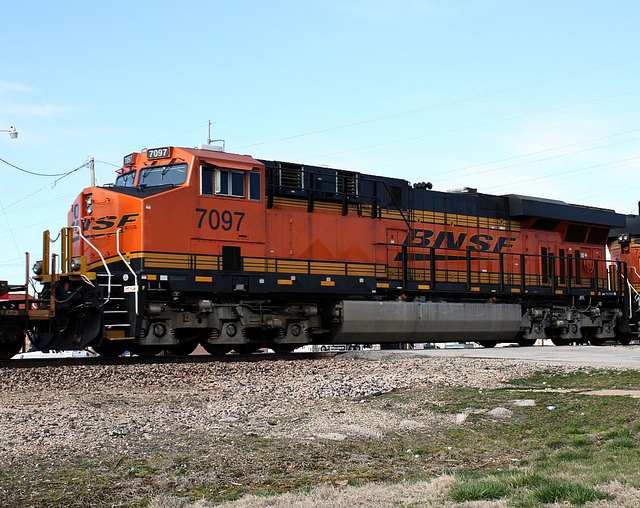

In [ ]:
Image.open('/content/train2014/COCO_train2014_000000335236.jpg')

In [ ]:
# Check average length of sentence in original set, and prediction or Inception & EffNet
efficient_word=0
inception_word=0
original_word=0
for i in range(len(incept_effi)):
  # split token
  incept=incept_effi.iloc[i,4][2:-2].split(',')
  effi=incept_effi.iloc[i,8][2:-2].split(',')
  original=incept_effi.iloc[i,3][2:-2].split(',')
  #count total words
  inception_word+=len(incept)
  efficient_word+=len(effi)
  original_word+=len(original)

In [ ]:
print('Avg length inception: ', inception_word/len(incept_effi))
print('Avg length efficient: ', efficient_word/len(incept_effi))
print('Avg length original: ', original_word/(len(incept_effi)*5))

Avg length inception:  10.689
Avg length efficient:  11.341
Avg length original:  10.5174


In [ ]:
# Check average length of bad caption in Inception & Efficient
efficient_bad_word=0
inception_bad_word=0

for i in range(len(effi_bad)):
  # split token
  effi=effi_bad.iloc[i,8][2:-2].split(',')
  #count total words
  efficient_bad_word+=len(effi)

#create data of bad caption from inception
incept_bad=incept_effi[incept_effi['0_x']<=0.3]

for i in range(len(incept_bad)):
  # split token
  incept=incept_bad.iloc[i,8][2:-2].split(',')
  #count total words
  inception_bad_word+=len(incept)

In [ ]:
print('Avg length bad efficient',efficient_bad_word/len(effi_bad))
print('Avg length bad inception',inception_bad_word/len(incept_bad))

Avg length bad efficient 17.485294117647058
Avg length bad inception 10.75


In [ ]:
for i in incept_effi[incept_effi['0_x']==0.5]['1'].values:
  print(i)
  print('inception',incept_effi[incept_effi['1']==i]['0_x'].values,incept_effi[incept_effi['1']==i]['3_x'].values)

/content/train2014/COCO_train2014_000000346437.jpg
inception [0.5] ["['a', 'number', 'of', 'zebras', 'standing', 'in', 'the', 'grass']"]
/content/train2014/COCO_train2014_000000528355.jpg
inception [0.5] ["['a', 'piece', 'of', 'pizza', 'sits', 'on', 'a', 'table']"]


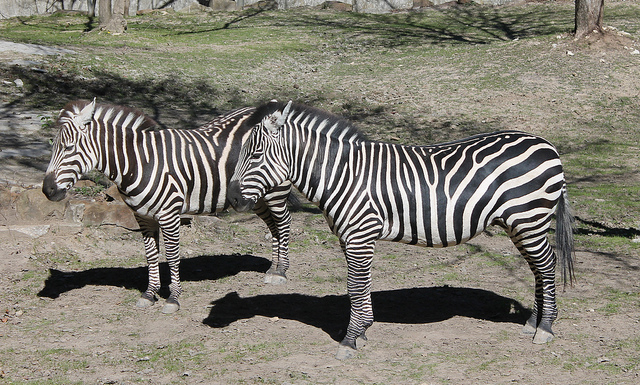

In [ ]:
Image.open('/content/train2014/COCO_train2014_000000346437.jpg')

In [ ]:
incept_effi[incept_effi['1']=='/content/train2014/COCO_train2014_000000346437.jpg']['2_x'].values

array(['[[\'two\', \'zebras\', \'grazing\', \'in\', \'a\', \'nearby\', \'grassy\', \'plains\', \'area\'], [\'two\', "zebra\'s", \'standing\', \'side\', \'by\', \'side\', \'in\', \'the\', \'grass\', \'dirt\'], [\'two\', \'zebras\', \'standing\', \'next\', \'together\', \'in\', \'their\', \'den\'], [\'two\', \'zebra\', \'standing\', \'next\', \'to\', \'each\', \'other\', \'on\', \'a\', \'dry\', \'grass\', \'covered\', \'field\'], [\'two\', \'zebras\', \'standing\', \'near\', \'each\', \'other\', \'on\', \'a\', \'field\', \'of\', \'grass\']]'],
      dtype=object)

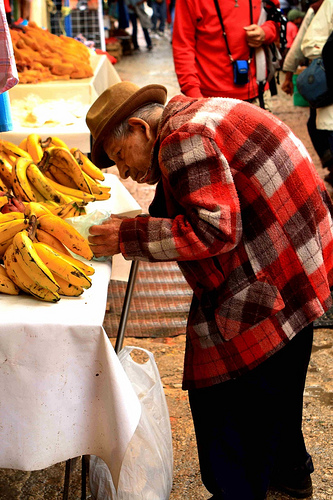

In [ ]:
Image.open('/content/train2014/COCO_train2014_000000044488.jpg')

In [ ]:
incept_effi[incept_effi['1']=='/content/train2014/COCO_train2014_000000044488.jpg']['2_x'].values

array(["[['the', 'elderly', 'man', 'is', 'looking', 'at', 'bushels', 'of', 'bananas', 'on', 'a', 'table'], ['a', 'man', 'bending', 'over', 'table', 'topped', 'with', 'lots', 'of', 'bananas'], ['an', 'older', 'man', 'is', 'examining', 'a', 'table', 'of', 'bananas'], ['an', 'older', 'man', 'is', 'inspecting', 'some', 'bananas', 'at', 'an', 'outdoor', 'market'], ['an', 'older', 'man', 'standing', 'in', 'from', 'of', 'a', 'table', 'with', 'bunches', 'of', 'bananas']]"],
      dtype=object)

In [ ]:
incept_effi[incept_effi['1']=='/content/train2014/COCO_train2014_000000044488.jpg']['0_x'].values

array([0.80342842])

In [ ]:
incept_effi[incept_effi['1']=='/content/train2014/COCO_train2014_000000044488.jpg']['3_x'].values

array(["['a', 'bunch', 'of', 'fruit', 'are', 'looking', 'up', 'containers', 'of', 'food', 'on', 'concrete']"],
      dtype=object)